In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
data = datasets.load_breast_cancer()
X,y = data.data, data.target

In [19]:
len(np.unique(X[:, 29]))

535

In [3]:
n_samples, n_features = X.shape

In [11]:
np.unique(X)

array([0.000e+00, 6.920e-04, 7.929e-04, ..., 3.234e+03, 3.432e+03,
       4.254e+03], shape=(11998,))

In [35]:
np.shape(X)[1]

30

In [20]:
pd.DataFrame(np.unique(X))

,0
0,0.000000
1,0.000692
2,0.000793
3,0.000895
4,0.000950
...,...
11993,3143.000000
11994,3216.000000
11995,3234.000000
11996,3432.000000


## Passos para desenvolver a árvore de decisão:

1. Sortear amostras aleatórias (Evitar overfiting)
2. Acho a melhor divisão de dados (best_split)
3. Calcular o ganho de informação para cada split
4. Calcular a entropia de cada split
5. Retornar a melhor feature e treshold


**obs**: *O código é recursivo, nisto sempre que surgir um novo nó será necessário repetir o mesmo processo acima*

### Funções a serem desenvolvidas 

- best_split
- information_gain
- split
- entropy


#### best_split 

> Determina qual feature e qual limiar de corte geram a melhor separação dos dados.

Parâmetros:

- X -> features 
- y -> targets
- feat_idxs -> Indíces escolhidos aleatoriamente de X


Retorna: 

> feature e treshold com maior ganho de informação

- Indice da melhor feature e treshold

#### information_gain

> Mede quanto a entropia (incerteza) do conjunto é reduzida ao dividir os dados com base em uma feature 


Parâmetros:

- parent -> rótulos do nó, utilizados para calcular a entropia geral
- feature -> Coluna de X e seus respectivos valores (com base no feat_idxs)
- treshold -> Valor que será utilizado para o split (ex: x > 5)

Retorna:

- Ganho de informação de um determinado split


#### split

> Realiza a separação dos dados (X), com base em um treshold passado

Parâmetros:

- feature
- treshold -> Valor que será utilizado para o split (ex: x > 5)

Retorna:

- Indices a direita e esquerda do treshold


#### entropy 

> Cálcula a desordem de um determinado conjunton de dados

Parâmetros:

- y -> Targest

Retorna:

- entropia do conjunto

### Split

In [4]:
def split(X_colum, treshold):
    left_idxs = np.argwhere(X_colum <= treshold).flatten() 
    right_idxs = np.argwhere(X_colum > treshold).flatten()
    return left_idxs, right_idxs 

### Gini

In [190]:
def gini(y):
    result = 0 
    for label in np.unique(y):
        sample_label = y[y == label]
        pi = len(sample_label) / len(y)
        result += pi * (1 - pi)
    return result

In [191]:
gini(y)

0.4675300607546925

### Entropia

In [5]:
def entropy(y):
    result = 0 
    for label in np.unique(y):
        sample_label = y[y == label]
        p1 = len(sample_label) / len(y)
        result += -p1 * np.log2(p1)
    return result

In [30]:
entropy(y)

np.float64(0.9526351224018599)

### Information Gain

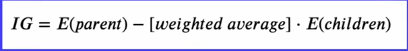

In [ ]:
def information_gain(parent, feature, treshold):
    parent_entropy = entropy(parent)
    left_idxs, right_idxs = split(feature, treshold)
    
   
    if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
    
    n = len(parent)
    n_l, n_r = len(left_idxs), len(right_idxs)
    e_l, e_r = entropy(parent[left_idxs]), entropy(parent[right_idxs])
    children_entropy = (n_l / n) * e_l + (n_r / n) * e_r
    
    gain_information = parent_entropy - children_entropy
    return gain_information 
    

In [200]:
def information_gain(parent, feature, treshold):
    parent_entropy = gini(parent)
    left_idxs, right_idxs = split(feature, treshold)
    
   
    if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
    
    n = len(parent)
    n_l, n_r = len(left_idxs), len(right_idxs)
    e_l, e_r = gini(parent[left_idxs]), gini(parent[right_idxs])
    children_entropy = (n_l / n) * e_l + (n_r / n) * e_r
    
    gain_information = parent_entropy - children_entropy
    return gain_information 

### Best split

In [194]:
def best_split(X,y, feat_idxs):
    best_gain = - 1
    best_feature, best_threshold = None, None 
    for feat_idx in feat_idxs:
        thresholds = np.unique(X[:,feat_idx])
        for thr in thresholds:
            gi = information_gain(y, X[:,feat_idx], thr)
            if gi > best_gain:
                best_gain = gi
                best_feature = feat_idx
                best_threshold = thr
    return best_feature, best_threshold
    

In [90]:
n_samples, n_feats = X.shape

feat_idxs = np.random.choice(n_feats, 30, replace=False)

test_feature, test_threshold = best_split(X, y ,feat_idxs)

In [91]:
print(f"Best Feature: {test_feature}")
print(f"Best Threshold: {test_threshold}")

Best Feature: 22
Best Threshold: 105.9


### Função para criar árvore

In [17]:
teste = pd.Series(y)
teste

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Length: 569, dtype: int64

In [24]:
teste.value_counts()

1    357
0    212
Name: count, dtype: int64

In [23]:
teste.mode()[0]

np.int64(1)

In [12]:
len(np.unique(y))

2

In [27]:
def most_comman_target(y):
    y_series = pd.Series(y)
    return y_series.mode()[0]

In [28]:
most_comman_target(y)

np.int64(1)

In [ ]:
DICT_TREE = {}

class Node:
    def __init__(self, right=None, left=None, feature=None, threshold=None,*,value=None):
        self.right = right
        self.left = left
        self.feature =feature
        self.threshold = threshold
        self.value = value
    
    def is_leaf_node(self):
        return self.value is not None
        
        
def grow_tree(X,y, depth=0):
    
    np.random.seed(42)
    
    n_samples, n_feats = X.shape
    labels = len(np.unique(y))
    feat_idxs = np.random.choice(n_feats, 10, replace=False)
    
    stop_param = (depth >= 10 or labels == 1 or n_samples < 100)
    
    if stop_param:
        leaf_value = most_comman_target(y)
        return Node(value=leaf_value)

    best_feature, best_threshold = best_split(X, y ,feat_idxs)
    
    left_idxs, right_idxs = split(X[:, best_feature], best_threshold)
    print(len(right_idxs), len(left_idxs), best_feature, best_threshold)
    
    right = grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
    left = grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
   
    return Node(right, left, best_feature, best_threshold)
    
    

In [154]:
root = grow_tree(X,y)

183 386 23 880.8
154 29 27 0.1374
49 337 27 0.1357
25 312 23 783.6
7 305 12 4.099
56 249 23 653.3
55 1 23 653.6


In [68]:
len(X)

569

In [92]:
left, right = split(X[:, 22], 105.9)

In [93]:
len(left), len(right)

(345, 224)

In [157]:
X[2]

array([1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
       1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
       4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
       2.250e-02, 4.571e-03, 2.357e+01, 2.553e+01, 1.525e+02, 1.709e+03,
       1.444e-01, 4.245e-01, 4.504e-01, 2.430e-01, 3.613e-01, 8.758e-02])

### Função predict 

In [197]:
def walk_tree(sample,node):
    if node.is_leaf_node():
        return node.value
    
    if sample[node.feature] <= node.threshold:
        return walk_tree(sample, node.left)
    return walk_tree(sample, node.right)

In [172]:
def predict(X, root):
    return np.array([walk_tree(sample, root) for sample in X])

In [195]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42)

In [198]:
mdl = grow_tree(X_train, y_train)

y_pred = predict(X_val, mdl)

151 304 27 0.1423
147 4 23 476.4
146 1 24 0.08949
145 1 12 1.143
139 6 23 675.2
130 9 27 0.1489
20 284 23 947.9
283 1 28 0.1565
15 268 23 840.8
8 260 27 0.1357
6 254 12 4.099
13 241 23 783.6
45 196 23 648.3


In [167]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [199]:
print(accuracy_score(y_val, y_pred))

0.9473684210526315


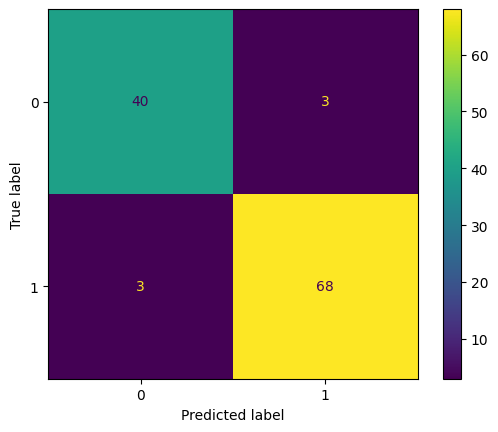

In [170]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred);